In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output
import os

# Define the path for the CSV file
csv_path = "men_manual_check_dataset.csv"

# Check if the CSV file exists; if not, create it with game IDs from 0 to 990
if not os.path.exists(csv_path):
    print(f"CSV file '{csv_path}' not found. Creating a new file...")
    data = pd.DataFrame({
        "index": range(0, 991),
        "dataset_name": ["men_imbalanced"] * 991,
        "ball_flying_issue": [None] * 991,
        "player_number_issue": [None] * 991,
        "success_label_issue": [None] * 991,
        "comments": [None] * 991,
        "manual_check_passed": [None] * 991
    })
    data.to_csv(csv_path, index=False)
else:
    data = pd.read_csv(csv_path)

# Automatically mark missing game IDs with a comment
for game_id in missing_game_ids:
    if game_id in data['index'].values:
        data.loc[data['index'] == game_id, 'comments'] = "Missing game_id"

# Global variables
current_start_index = 0
rows_per_page = 10

# Helper function to create toggle buttons with color feedback
def create_issue_buttons(row):
    is_missing = row["index"] in missing_game_ids

    def create_toggle(description, value):
        button = widgets.ToggleButton(
            value=(value == "X"),
            description=description,
            disabled=is_missing,
            button_style='danger' if value == "X" else ''  # Red if marked with "X"
        )
        button.observe(on_toggle_change, names='value')
        return button

    buttons = {
        "ball_flying_issue": create_toggle("Ball Flying Issue", row["ball_flying_issue"]),
        "player_number_issue": create_toggle("Player Number Issue", row["player_number_issue"]),
        "success_label_issue": create_toggle("Success Label Issue", row["success_label_issue"]),
        "comments": widgets.Text(
            value=str(row["comments"]) if pd.notna(row["comments"]) else "",
            placeholder="Add comments",
            disabled=is_missing
        ),
        "manual_check_passed": widgets.ToggleButton(
            value=(row["manual_check_passed"] == "Green"),
            description="Check Passed",
            button_style='success' if row["manual_check_passed"] == "Green" else '',
            disabled=is_missing
        )
    }
    buttons["manual_check_passed"].observe(on_manual_check_toggle, names='value')
    return buttons

# Function to handle the manual check button toggle
def on_manual_check_toggle(change):
    button = change.owner
    if change.new:  # If the button is clicked (value is True)
        button.button_style = 'success'
        button.value = True
    else:  # If clicked again (value is False)
        button.button_style = ''
        button.value = False

# Update button color when toggled for issue buttons
def on_toggle_change(change):
    button = change.owner
    button.button_style = 'danger' if button.value else ''

# Store the widgets for the current page
widgets_list = []

# Function to display rows based on the current index
def display_rows():
    global widgets_list
    widgets_list = []

    # Clear previous output
    clear_output(wait=True)

    # Display navigation and save buttons
    display(widgets.HBox([prev_button, next_button, dropdown, save_button]))

    # Prepare the rows for display
    rows = []
    for i in range(current_start_index, min(current_start_index + rows_per_page, len(data))):
        row = data.iloc[i]
        buttons = create_issue_buttons(row)
        widgets_list.append((i, buttons))

        label_text = f"ID: {row['index']} | Dataset: {row['dataset_name']}"
        if row["index"] in missing_game_ids:
            label_text += " (Missing game_id)"

        row_widgets = widgets.HBox([
            widgets.Label(label_text),
            buttons["ball_flying_issue"],
            buttons["player_number_issue"],
            buttons["success_label_issue"],
            buttons["comments"],
            buttons["manual_check_passed"]
        ])
        rows.append(row_widgets)

    # Display the rows
    display(*rows)

# Function to save annotations for the current page
def save_annotations():
    for i, buttons in widgets_list:
        if data.loc[i, "index"] in missing_game_ids:
            continue

        data.loc[i, "ball_flying_issue"] = "X" if buttons["ball_flying_issue"].value else None
        data.loc[i, "player_number_issue"] = "X" if buttons["player_number_issue"].value else None
        data.loc[i, "success_label_issue"] = "X" if buttons["success_label_issue"].value else None
        data.loc[i, "comments"] = buttons["comments"].value
        data.loc[i, "manual_check_passed"] = "Green" if buttons["manual_check_passed"].value else "Red"

# Button click event handlers
def on_next_clicked(b):
    global current_start_index
    save_annotations()
    if current_start_index + rows_per_page < len(data):
        current_start_index += rows_per_page
    update_dropdown()
    display_rows()

def on_prev_clicked(b):
    global current_start_index
    save_annotations()
    if current_start_index - rows_per_page >= 0:
        current_start_index -= rows_per_page
    update_dropdown()
    display_rows()

def on_dropdown_change(change):
    global current_start_index
    save_annotations()
    current_start_index = change.new * rows_per_page
    display_rows()

# Initialize navigation and save buttons
next_button = widgets.Button(description="▶️ Next", button_style='success')
prev_button = widgets.Button(description="◀️ Previous", button_style='info')
save_button = widgets.Button(description="Save to CSV", button_style='warning')

next_button.on_click(on_next_clicked)
prev_button.on_click(on_prev_clicked)
save_button.on_click(lambda x: save_to_csv())

# Initialize dropdown for ID navigation
dropdown = widgets.Dropdown(
    options=[(f"Rows {i}-{i + rows_per_page - 1}", i // rows_per_page) for i in range(0, len(data), rows_per_page)],
    value=0,
    description="Navigate:",
)
dropdown.observe(on_dropdown_change, names='value')

# Function to update the dropdown value based on current index
def update_dropdown():
    dropdown.value = current_start_index // rows_per_page

# Function to save the annotated data
def save_to_csv():
    save_annotations()
    data.to_csv(csv_path, index=False)
    print(f"Annotations saved to '{csv_path}'")

# Display initial UI and the first set of rows
display(widgets.HBox([prev_button, next_button, dropdown, save_button]))
display_rows()


Annotations saved to 'men_manual_check_dataset.csv'


/var/folders/9d/wzfpl93x5zb1rrt2jm2wtp300000gn/T/ipykernel_90416/1212205439.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_matrix = data[issue_columns].applymap(lambda x: 1 if x == "X" else 0)


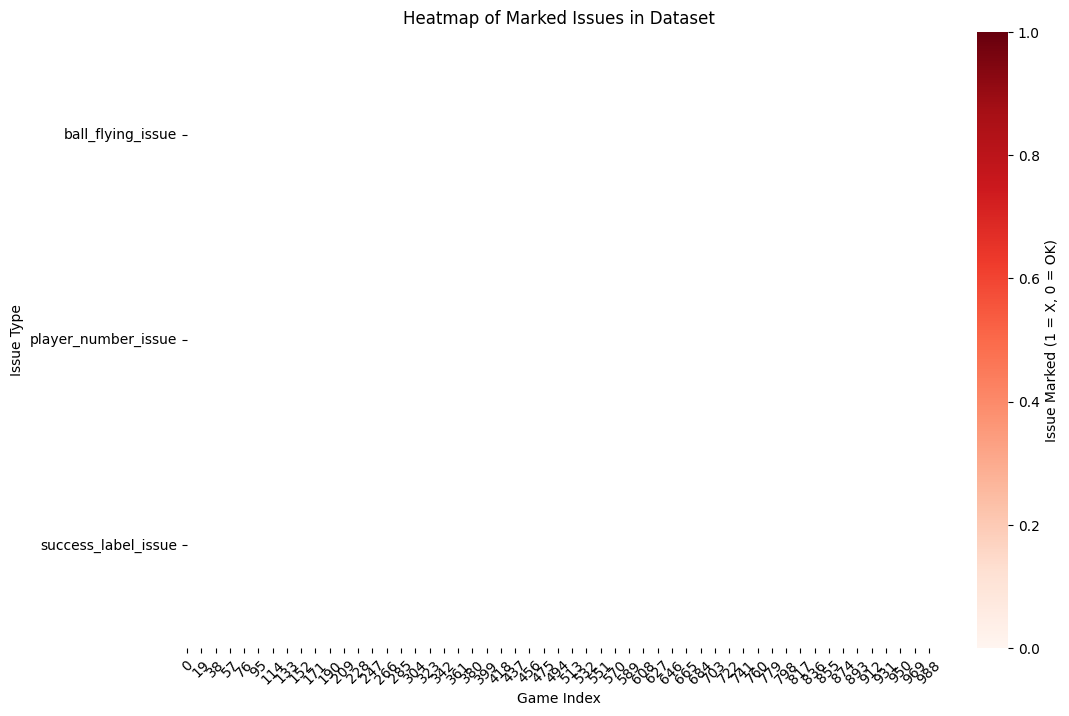

Mistakes DataFrame:
    index    dataset_name ball_flying_issue  player_number_issue  \
2       2  men_imbalanced                 X                  NaN   
3       3  men_imbalanced                 X                  NaN   
4       4  men_imbalanced               NaN                  NaN   
5       5  men_imbalanced                 X                  NaN   
6       6  men_imbalanced               NaN                  NaN   
8       8  men_imbalanced               NaN                  NaN   
9       9  men_imbalanced                 X                  NaN   
10     10  men_imbalanced               NaN                  NaN   
15     15  men_imbalanced               NaN                  NaN   
19     19  men_imbalanced                 X                  NaN   

   success_label_issue               comments manual_check_passed  
2                    X                    NaN                 Red  
3                  NaN  Ball flying potential                 Red  
4                    X     

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annotated CSV file
csv_path = "men_manual_check_dataset.csv"
data = pd.read_csv(csv_path)

# Define a function to visualize mistakes with a heatmap
def visualize_mistakes_heatmap(data):
    # Define columns with potential issues
    issue_columns = ["ball_flying_issue", "player_number_issue", "success_label_issue"]
    
    # Create a binary matrix (1 if marked with "X", 0 otherwise)
    binary_matrix = data[issue_columns].applymap(lambda x: 1 if x == "X" else 0)
    
    # Calculate the sum of issues per game ID
    issue_summary = binary_matrix.sum(axis=1)

    # Create a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(binary_matrix.T, cmap="Reds", cbar_kws={'label': 'Issue Marked (1 = X, 0 = OK)'}, linewidths=0.5)
    plt.title("Heatmap of Marked Issues in Dataset")
    plt.xlabel("Game Index")
    plt.ylabel("Issue Type")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # Print the filtered DataFrame with marked issues
    mistakes_df = data[(data[issue_columns] == "X").any(axis=1)]
    print("Mistakes DataFrame:")
    print(mistakes_df)

# Call the function
visualize_mistakes_heatmap(data)
